We the numerical application of the time-evolution operator in quantum mechanics using a simple Python implementation.
We will consider first a  two-level system driven by a harmonic coupling.


# Theoretical Background
 
 In quantum mechanics, the time evolution of a state vector |\psi(t)\rangle is governed by the time-dependent Schrödinger equation:
 
 $$
 i \hbar \frac{d}{dt} |\psi(t)\rangle = H(t) |\psi(t)\rangle
 $$
 
 For a small time step $ dt $, the solution can be approximated by applying the unitary time evolution operator:
 
 $$
 |\psi(t + \Delta t)\rangle \approx e^{-i H(t) dt / \hbar} |\psi(t)\rangle
 $$
 
 In the following, we set $ \hbar = 1 $.

# The `MultiLevel` Class Implementation
 
 We implement a simple Python class to define and propagate quantum states in an N-level system.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from scipy.linalg import expm

class MultiLevel:
    def __init__(self, ndim=2):
        self.ndim = ndim
        self.h = np.zeros((ndim, ndim), dtype=complex)  
        self.V = lambda t: np.zeros((ndim, ndim), dtype=complex)  
        
    def set_hamiltonian(self, diagonal):
        np.fill_diagonal(self.h, diagonal)

    def set_coupling(self, V_func):
        self.V = V_func

    def getH(self, t):
        return self.h + self.V(t)

    def propagate(self, psi0, dt, nstep):

        psi0 = np.asarray(psi0, dtype=complex)
        psi_t = np.zeros((nstep + 1, self.ndim), dtype=complex)
        psi_t[0] = psi0

        for i in range(1, nstep + 1):
            t = (i - 1) * dt
            H = self.getH(t)
            U = expm(-1j * H * dt)
            psi_t[i] = U @ psi_t[i - 1]

        return psi_t


#  Two-Level System with harmonic coupling

 Consider a two-level system with energies $ E_0 = 0 $, $ E_1 = \Delta $, and a Gaussian coupling:

 $$
 V_{01} = V_{10} = V_0 \cos(\omega t)
 $$

In [39]:
Delta = 1.0     # Energy difference
V0 = 0.1        # Coupling strength
omega = 1.0-.05     # Frequency of a light-field
coupling = lambda t: np.array([[0, V0*np.cos(omega*t) ],
                               [V0 *np.cos(omega*t) , 0]], dtype=complex)


In [40]:
sys = MultiLevel(ndim=2)
sys.set_hamiltonian([0, Delta])
sys.set_coupling(coupling)
psi0=np.array([1.0,0.0],dtype = complex)


In [41]:
nstep = 1000
dt = 0.1
psi_t = sys.propagate(psi0, dt, nstep)

In [42]:
pop = np.abs(psi_t)**2
coh = np.einsum('ti,tj->tij',psi_t.conj(),psi_t)
time = np.linspace(0,100.0,1000+1)

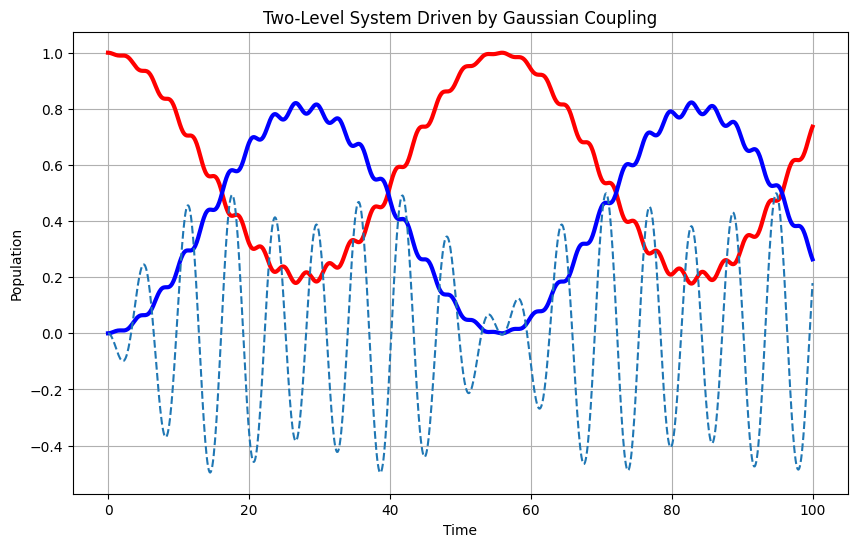

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(time, pop[:,0], lw = 3.0, color = "red")
plt.plot(time, pop[:,1], lw = 3.0, color = "blue")
plt.plot(time, coh[:,0,1], "--")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Two-Level System Driven by Gaussian Coupling')
plt.grid(True)